In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv("/content/drive/MyDrive/KOPIS공모전/활용데이터 및 코드/할인율학습데이터/data_w_기존컬럼.csv")
df.head()

<ipython-input-9-fc27d9765178>:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/KOPIS공모전/활용데이터 및 코드/할인율학습데이터/data_w_기존컬럼.csv")


,좌석수,공연코드,공연일시,예매/취소일시,예매/취소구분,예매/취소매수,예매/취소금액,예매/취소방식명(관리시스템),할인금액,할인종류명(전송처),...,공연지역명_전라도,공연지역명_제주도,공연지역명_충청도,계층_조합_뮤지컬_1,계층_조합_뮤지컬_2,계층_조합_연극_0,계층_조합_연극_1,계층_조합_연극_2,성별_1,성별_2
0,14,PF304959,2022-06-02 14:00,2022-05-02 09:38,1,1,69000.0,모바일,0,기타,...,False,True,False,False,False,True,False,False,False,True
1,365,PF300599,2022-06-09 20:00,2022-06-08 22:22,1,1,26400.0,웹,0,NaN,...,False,False,False,True,False,False,False,False,False,False
2,1766,PF308077,2022-06-09 19:30,2022-05-24 09:56,1,1,135000.0,모바일,0,NaN,...,False,False,False,False,True,False,False,False,False,True
3,0,PF312815,2022-06-09 19:30,2022-06-09 13:00,1,1,27000.0,모바일,0,기타,...,False,False,False,False,False,True,False,False,False,True
4,406,PF308025,2022-06-04 19:00,2022-05-11 19:04,1,1,46200.0,웹,19800,기타,...,False,False,False,True,False,False,False,False,False,True


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6743859 entries, 0 to 6743858
Data columns (total 42 columns):
 #   Column           Dtype  
---  ------           -----  
 0   좌석수              int64  
 1   공연코드             object 
 2   공연일시             object 
 3   예매/취소일시          object 
 4   예매/취소구분          int64  
 5   예매/취소매수          int64  
 6   예매/취소금액          float64
 7   예매/취소방식명(관리시스템)  object 
 8   할인금액             int64  
 9   할인종류명(전송처)       object 
 10  장당금액             int64  
 11  성별               int64  
 12  공연시작일자           object 
 13  공연종료일자           object 
 14  장르명              int64  
 15  출연진내용            object 
 16  아동공연 여부          object 
 17  내한공연 여부          object 
 18  오픈런 여부           object 
 19  판매시작일시           object 
 20  판매종료일시           object 
 21  좌석등급             object 
 22  극장규모             int64  
 23  재관람              int64  
 24  예매/취소방식명(전송처)    object 
 25  스타배우             int64  
 26  할인율              float64
 27  AGE         

# 공연횟수 분포 시각화

In [11]:
df['공연횟수'] = df.groupby('공연코드')['공연일시'].transform('nunique')

In [19]:
df.head()

,좌석수,공연코드,공연일시,예매/취소일시,예매/취소구분,예매/취소매수,예매/취소금액,예매/취소방식명(관리시스템),할인금액,할인종류명(전송처),...,공연지역명_제주도,공연지역명_충청도,계층_조합_뮤지컬_1,계층_조합_뮤지컬_2,계층_조합_연극_0,계층_조합_연극_1,계층_조합_연극_2,성별_1,성별_2,공연횟수
0,14,PF304959,2022-06-02 14:00,2022-05-02 09:38,1,1,69000.0,모바일,0,기타,...,True,False,False,False,True,False,False,False,True,1019
1,365,PF300599,2022-06-09 20:00,2022-06-08 22:22,1,1,26400.0,웹,0,NaN,...,False,False,True,False,False,False,False,False,False,117
2,1766,PF308077,2022-06-09 19:30,2022-05-24 09:56,1,1,135000.0,모바일,0,NaN,...,False,False,False,True,False,False,False,False,True,102
3,0,PF312815,2022-06-09 19:30,2022-06-09 13:00,1,1,27000.0,모바일,0,기타,...,False,False,False,False,True,False,False,False,True,36
4,406,PF308025,2022-06-04 19:00,2022-05-11 19:04,1,1,46200.0,웹,19800,기타,...,False,False,True,False,False,False,False,False,True,84


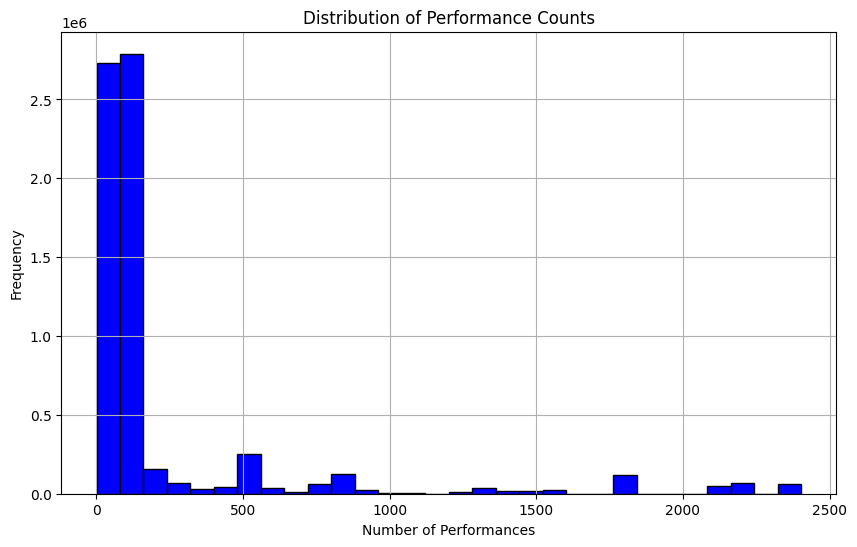

In [12]:
# 공연횟수의 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(df['공연횟수'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Performance Counts')
plt.xlabel('Number of Performances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

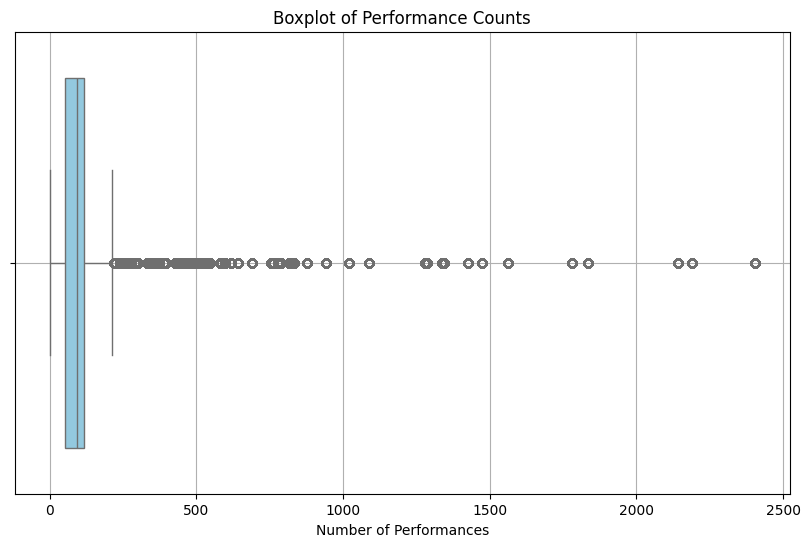

In [13]:
# 상자 수염 그림으로 공연횟수 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['공연횟수'], color='skyblue')
plt.title('Boxplot of Performance Counts')
plt.xlabel('Number of Performances')
plt.grid(True)
plt.show()

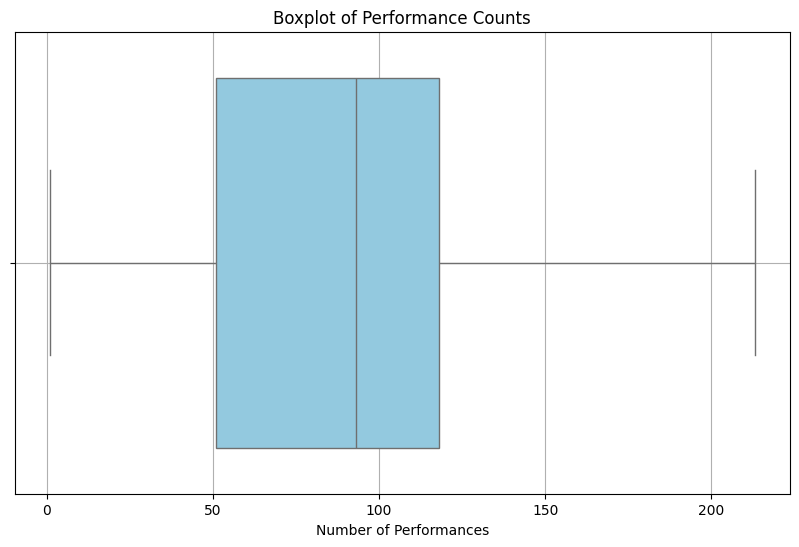

In [14]:
# 상자 수염 그림으로 공연횟수 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['공연횟수'], color='skyblue', showfliers=False)
plt.title('Boxplot of Performance Counts')
plt.xlabel('Number of Performances')
plt.grid(True)
plt.show()

**윈도우 크기를 30회정도로 설정하는 것이 좋아 보인다.**

# 30회 미만의 공연 분포 시각화

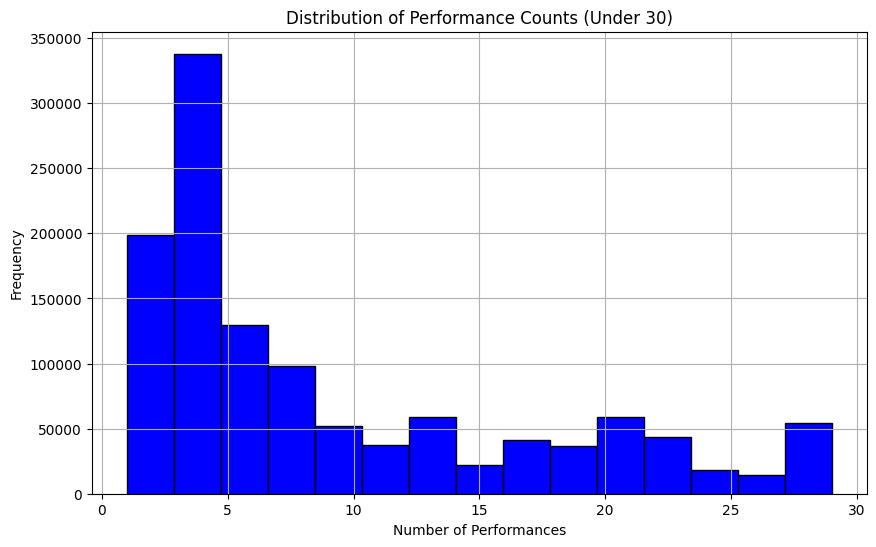

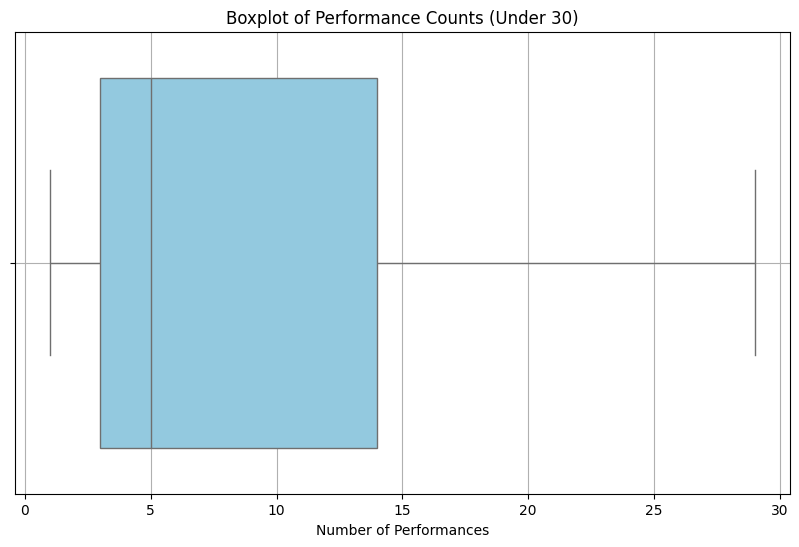

In [15]:
# 30회 미만의 공연 횟수를 가진 데이터를 필터링
df_under_30 = df[df['공연횟수'] < 30]

# 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(df_under_30['공연횟수'], bins=15, color='blue', edgecolor='black')
plt.title('Distribution of Performance Counts (Under 30)')
plt.xlabel('Number of Performances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 상자 수염 그림으로 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_under_30['공연횟수'], color='skyblue')
plt.title('Boxplot of Performance Counts (Under 30)')
plt.xlabel('Number of Performances')
plt.grid(True)
plt.show()


In [23]:
print("30회 미만의 공연 갯수: ",df_under_30.shape[0])
print('전체 공연 갯수: ', df.shape[0])
print('전체 공연에서 30회 미만의 공연 비중:', np.round(df_under_30.shape[0]/ df.shape[0],4))

30회 미만의 공연 갯수:  1202986
전체 공연 갯수:  6743859
전체 공연에서 30회 미만의 공연 비중: 0.1784


공연횟수 30회 미만의 공연이 전체의 약 17.84%를 차지하여 적지 않은 비중을 차지하기 때문에, 패딩으로 이들을 처리하기에는 무리가 존재한다.

따라서 데이터를 30회 미만과 30회 이상의 공연으로 나누어 30회 이상의 공연일 경우 윈도우 크기를 30으로 처리, 30 미만의 공연은 슬라이딩 윈도우의 크기를 3정도로 처리한다.

In [24]:
# 공연횟수 3회 미만의 공연 갯수
# 3회 미만의 공연 횟수를 가진 데이터를 필터링
df_under_3 = df[df['공연횟수'] < 3]
print(df_under_3.shape[0])

198750


In [25]:
print("3회 미만의 공연 갯수: ",df_under_3.shape[0])
print('전체 공연 갯수: ', df.shape[0])
print('전체 공연에서 30회 미만의 공연 비중:', np.round(df_under_3.shape[0]/ df.shape[0],4))
print("30회 미만의 공연 갯수: ",df_under_30.shape[0])
print('전체 공연에서 30회 미만의 공연 비중:', np.round(df_under_3.shape[0]/ df_under_30.shape[0],4))

3회 미만의 공연 갯수:  198750
전체 공연 갯수:  6743859
전체 공연에서 30회 미만의 공연 비중: 0.0295
30회 미만의 공연 갯수:  1202986
전체 공연에서 30회 미만의 공연 비중: 0.1652


공연횟수가 3회 미만의 공연이 전체에서 약 2%를 차지하는 것으로 파악되었다.
이들은 단발성, 일회성 공연으로 우리의 모델의 목적에는 알맞지 않으므로 drop하여 사용할 것이다.